<a href="https://colab.research.google.com/github/chessman-2004/task_2_numberRecognition/blob/main/task_2_number_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

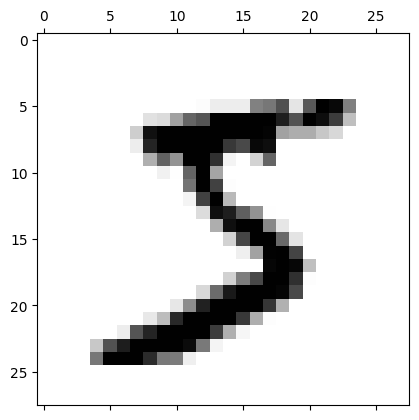

In [7]:
plt.matshow(X_train[0],cmap = 'binary')

In [8]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

#### we need to first normalize the given data by limiting their values in the range of [0,1] to use the sigmoid function to the best.

In [11]:
X_train=X_train/255
X_test=X_test/255

#### to be able to feed the given array to the neural network that we are going to use, we first need to flatten the array of elements.

In [12]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [13]:
X_train_flattend.shape

(60000, 784)

In [14]:
X_train_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

here we considered a sequential set of neurons, where all the 784 elements are considered in the first layer.

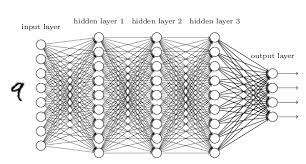

We'll have two hidden layers , where we'll further deduce the individual features of the image and identify it's features individually.
We'll train our model using a Simple Sequential Neural Network , where we use sigmoid function to activate a Dense layer of neurons and map them.

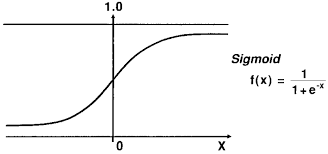

and the use of sigmoid function is as shown below :

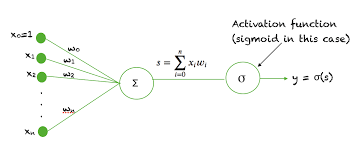

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4661 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9253


We'll evaluate our model using in-built evaluate function.The more the score,the more accurate the function is.

In [16]:
model.evaluate(X_test_flattend,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9273


[0.2646894156932831, 0.927299976348877]

In [17]:
model.predict(X_test_flattend)

313/313 [==============================] - 0s 921us/step


array([[2.8532617e-02, 2.8831454e-07, 6.6808201e-02, ..., 9.9975872e-01,
        9.0769850e-02, 6.5748262e-01],
       [5.2839774e-01, 5.0585098e-03, 9.9965322e-01, ..., 1.2332812e-12,
        2.0712265e-01, 2.1705691e-09],
       [4.2437480e-04, 9.9294722e-01, 6.9324774e-01, ..., 1.2209911e-01,
        3.8589716e-01, 3.7099835e-02],
       ...,
       [4.7603976e-06, 2.7039141e-06, 1.5214579e-03, ..., 1.7434403e-01,
        5.5252200e-01, 7.3642629e-01],
       [1.2567586e-04, 1.7118867e-04, 2.0967689e-04, ..., 4.5038927e-05,
        6.7690271e-01, 1.3006185e-04],
       [7.5084381e-03, 1.7410823e-10, 1.9149573e-01, ..., 1.8064606e-08,
        2.9212135e-04, 9.3742341e-07]], dtype=float32)

In [18]:
y_predicted=model.predict(X_test_flattend)
print(y_predicted[0])

313/313 [==============================] - 0s 874us/step
[2.85326168e-02 2.88314538e-07 6.68082014e-02 9.47657526e-01
 2.67083943e-03 1.03993386e-01 3.47188848e-06 9.99758720e-01
 9.07698497e-02 6.57482624e-01]


Argmax() function :
np.argmax returns the maximum element among the elements present in an array.It is used to predict our final values.
Syntax : np.argmax(element)

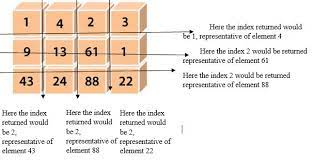

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
np.argmax(y_predicted[1])

2

As we can see, our precdiction is true.